<a href="https://colab.research.google.com/github/bmreiniger/datascience.stackexchange/blob/master/SO73639159_SVM_ovo_tiebreak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

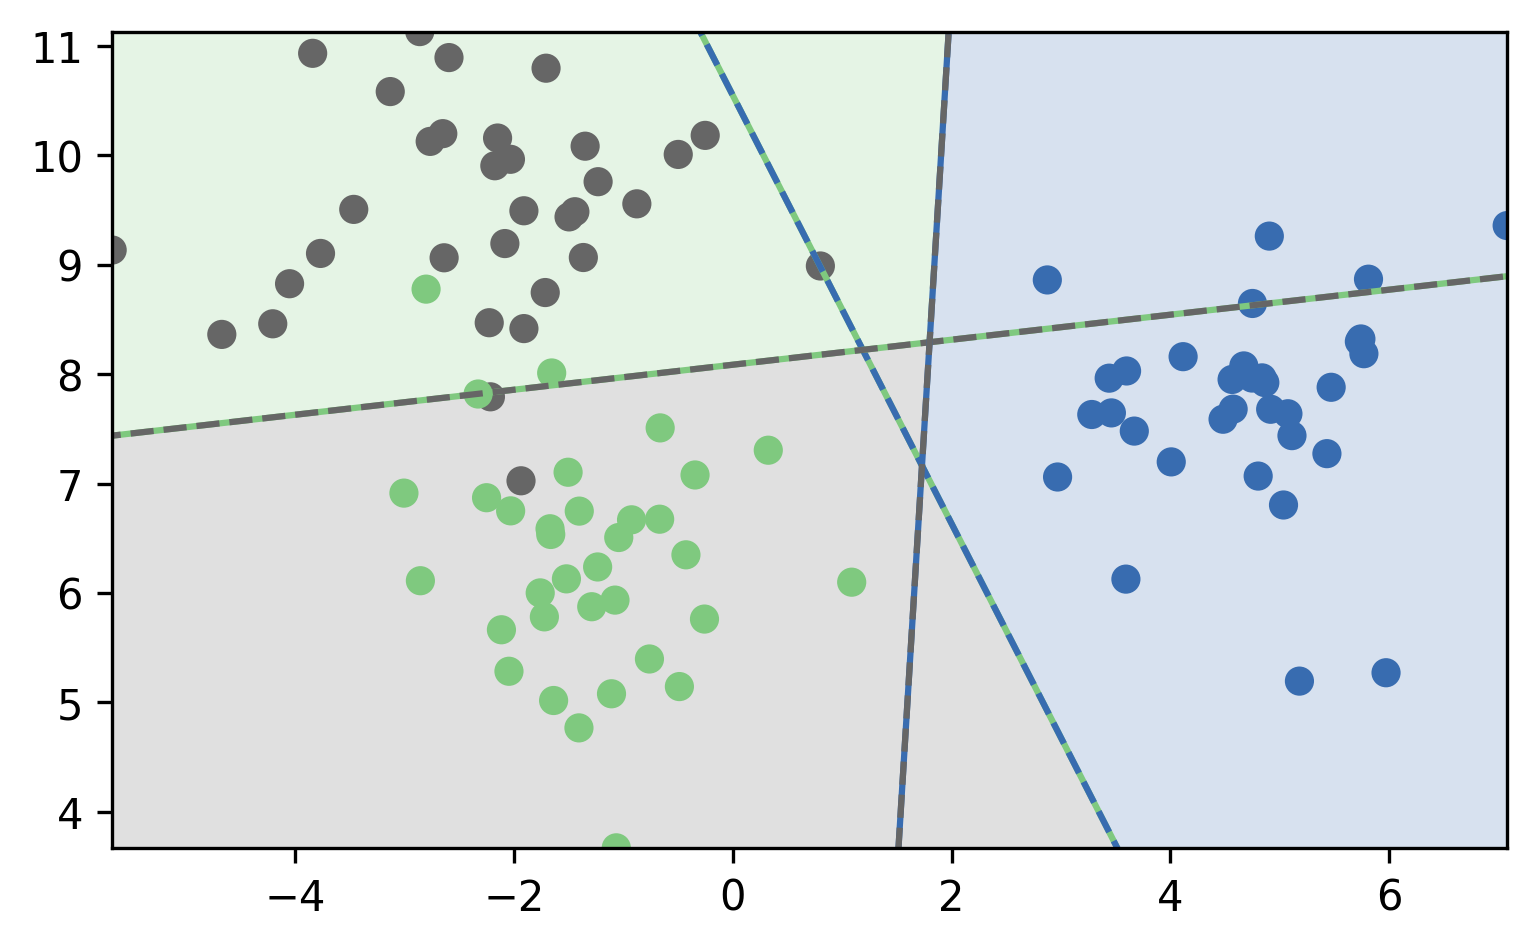

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.svm import SVC
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=27)

# y = 2 - y

svm = SVC(kernel="linear", decision_function_shape='ovo', C=1).fit(X, y)

# here goes the matplotlib code... why oh why?
xlim = [X[:, 0].min(), X[:, 0].max()]
ylim = [X[:, 1].min(), X[:, 1].max()]

xs = np.linspace(xlim[0], xlim[1], 1000)
ys = np.linspace(ylim[0], ylim[1], 1000)
xx, yy = np.meshgrid(xs, ys)

pred = svm.predict(np.c_[xx.ravel(), yy.ravel()])

colors = [plt.cm.Accent(i) for i in [0, 4, 7]]
plt.figure(dpi=300)

points = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
classes = [(0, 1), (0, 2), (1, 2)]
line = np.linspace(X[:, 1].min() - 5, X[:, 1].max() + 5)
plt.imshow(-pred.reshape(xx.shape), cmap="Accent", alpha=.2, extent=(xlim[0], xlim[1], ylim[1], ylim[0]))

for coef, intercept, col in zip(svm.coef_, svm.intercept_, classes):
    line2 = -(line * coef[1] + intercept) / coef[0]
    plt.plot(line2, line, "-", c=colors[col[0]])
    plt.plot(line2, line, "--", c=colors[col[1]])
plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect("equal")

In [22]:
svm.predict([[1.3, 8.05]])

array([0])

In [24]:
svm.decision_function([[1.3, 8.05]])
# normal y gives [-0.02045728,  0.2279638 , -0.46425899], votes [1, 0, 2]
# y=2-y gives    [ 0.46425888, -0.22849672,  0.02045728], votes [0, 2, 1] (original classes 2, 0, 1)

array([[ 0.46425888, -0.22849672,  0.02045728]])

In [26]:
svm.decision_function([[1.3, 8.05]])

array([[-0.02045728,  0.2279638 , -0.46425899]])

In [23]:
svm.predict([[-4, 4]]), svm.predict([[-4, 10]]), svm.predict([[6, 7]])

(array([2]), array([0]), array([1]))